In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [154]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['division.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving division.csv to division.csv


In [155]:
# Basic aggregations

### Pass Percentage
df["Pass_Percentage"] = (df["Above_70_Marks"] / df["No_of_Students_Sat"]) * 100

# Above Cutoff Percentage
df["Above_Cutoff_Percentage"] = (df["Above_Cutoff"] / df["No_of_Students_Sat"]) * 100

df = df.round(2)

In [156]:
df

,No,School,No_of_Students_Sat,Above_70_Marks,Above_Cutoff,Pass_Percentage,Above_Cutoff_Percentage
0,1,School 01,139,127,22,91.37,15.83
1,2,School 02,213,187,31,87.79,14.55
2,3,School 03,30,19,3,63.33,10.00
3,4,School 04,41,29,0,70.73,0.00
4,5,School 05,30,28,0,93.33,0.00
5,6,School 06,30,19,1,63.33,3.33
6,7,School 07,59,46,0,77.97,0.00
7,8,School 08,35,31,1,88.57,2.86


# School Ranking Based on Above Cutoff Percentage

In [157]:
print("School Ranking based on Above Cutoff Percentage")

df["Rank"] = df["Above_Cutoff_Percentage"].rank(method='min', ascending=False)
data = df.drop(['No'],axis=1)
data = data.sort_values(by=['Rank'])
datawithoutindex = data.to_string(index=False)
print(datawithoutindex)

School Ranking based on Above Cutoff Percentage
   School  No_of_Students_Sat  Above_70_Marks  Above_Cutoff  Pass_Percentage  Above_Cutoff_Percentage  Rank
School 01                 139             127            22            91.37                    15.83   1.0
School 02                 213             187            31            87.79                    14.55   2.0
School 03                  30              19             3            63.33                    10.00   3.0
School 06                  30              19             1            63.33                     3.33   4.0
School 08                  35              31             1            88.57                     2.86   5.0
School 04                  41              29             0            70.73                     0.00   6.0
School 05                  30              28             0            93.33                     0.00   6.0
School 07                  59              46             0            77.97            

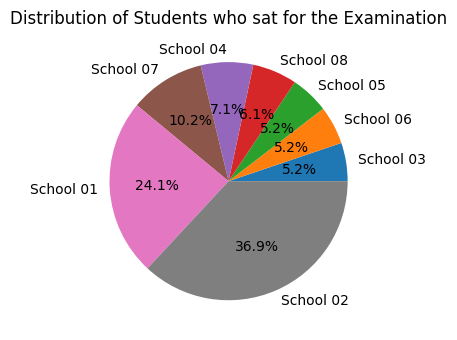

In [158]:
from matplotlib import pyplot as plt
data = data.sort_values(by=['No_of_Students_Sat'])
plt.title("Distribution of Students who sat for the Examination")
plt.pie(data["No_of_Students_Sat"], labels=data["School"], autopct = '%1.1f%%')
plt.show()

# School Ranking based on Pass Percentage

In [159]:
df["Rank"] = df["Pass_Percentage"].rank(method='min', ascending=False)
data = df.drop(['No'],axis=1)
data = data.sort_values(by=['Rank'])
datawithoutindex = data.to_string(index=False)
print(datawithoutindex)

   School  No_of_Students_Sat  Above_70_Marks  Above_Cutoff  Pass_Percentage  Above_Cutoff_Percentage  Rank
School 05                  30              28             0            93.33                     0.00   1.0
School 01                 139             127            22            91.37                    15.83   2.0
School 08                  35              31             1            88.57                     2.86   3.0
School 02                 213             187            31            87.79                    14.55   4.0
School 07                  59              46             0            77.97                     0.00   5.0
School 04                  41              29             0            70.73                     0.00   6.0
School 03                  30              19             3            63.33                    10.00   7.0
School 06                  30              19             1            63.33                     3.33   7.0


<Axes: xlabel='School'>

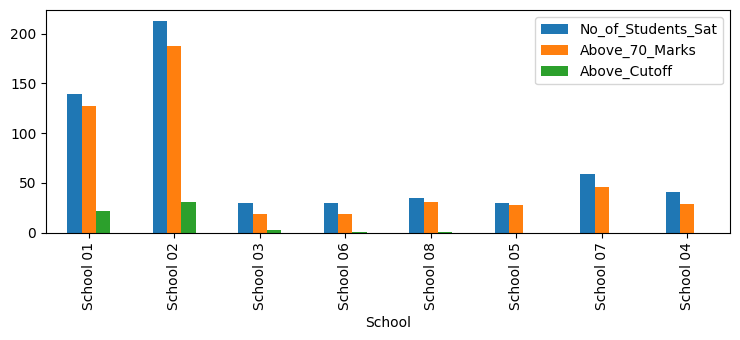

In [161]:
from matplotlib import pyplot as plt

# plotting graph
data["Rank"] = df["Above_Cutoff_Percentage"].rank(method='min', ascending=False)
data = data.sort_values(by=['Rank'])
data.plot(x="School", y=["No_of_Students_Sat", "Above_70_Marks","Above_Cutoff"], kind="bar")

<Figure size 7200x5760 with 0 Axes>

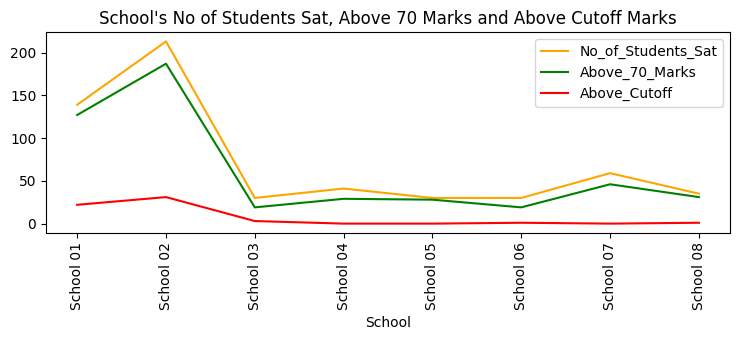

In [162]:
plt.figure(figsize=(100, 80), dpi=72)

data = df.drop(columns=['No','Pass_Percentage', 'Above_Cutoff_Percentage','Rank'])
data = data.set_index('School')
data.plot(label='Above_70_Marks', color=['orange', 'green','red'])

# adding title
plt.title("School's No of Students Sat, Above 70 Marks and Above Cutoff Marks")

# adding label to x-axis
plt.xlabel('School')
plt.xticks(rotation=90)

# adding legend.
plt.legend()

Text(0, 0.5, 'Above Pass Percentage')

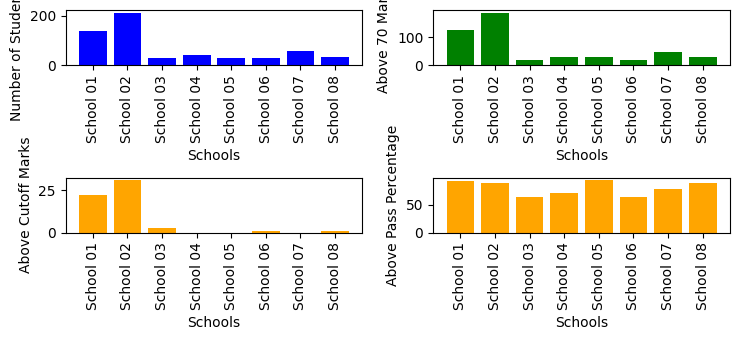

In [171]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2, 2, 1)
plt.bar(df["School"],df["No_of_Students_Sat"], color='blue')
plt.xlabel('Schools')
plt.xticks(rotation=90)
plt.ylabel('Number of Students Sat')

plt.subplot(2, 2, 2)
plt.bar(df["School"],df["Above_70_Marks"], color='green')
plt.xlabel('Schools')
plt.xticks(rotation=90)
plt.ylabel('Above 70 Marks')

plt.subplot(2, 2, 3)
plt.bar(df["School"],df["Above_Cutoff"], color='orange')
plt.xlabel('Schools')
plt.xticks(rotation=90)
plt.ylabel('Above Cutoff Marks')

plt.subplot(2, 2, 4)
plt.bar(df["School"],df["Pass_Percentage"], color='orange')
plt.xlabel('Schools')
plt.xticks(rotation=90)
plt.ylabel('Above Pass Percentage')

In [174]:
df["Below_Pass"] = df["No_of_Students_Sat"] - df["Above_70_Marks"]

<Axes: xlabel='School'>

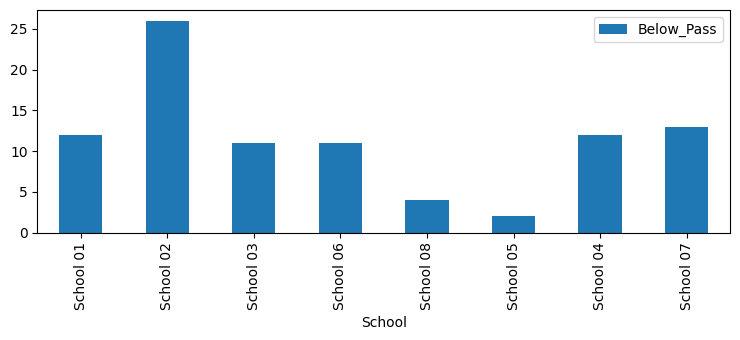

In [175]:
from matplotlib import pyplot as plt

# plotting graph
data["Rank"] = df["Above_Cutoff_Percentage"].rank(method='min', ascending=False)
data = data.sort_values(by=['Rank'])
data.plot(x="School", y=["Below_Pass"], kind="bar")

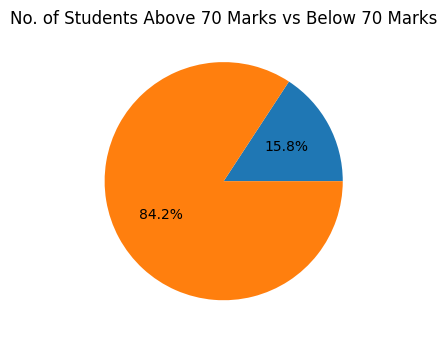

In [197]:
from matplotlib import pyplot as plt

plt.title("No. of Students Above 70 Marks vs Below 70 Marks")
plt.pie(df[['Below_Pass','Above_70_Marks']].sum(), autopct = '%1.1f%%')
plt.show()